In [39]:
import os
import boto3



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
BUCKET_NAME = 'sagemaker-cs281'

config = {
    'AWS_REGION':'us-east-2',                    # Region for the S3 bucket, this is not always needed. Default is us-east-1.
    'S3_ENDPOINT':'s3.us-east-2.amazonaws.com',  # The S3 API Endpoint to connect to. This is specified in a HOST:PORT format.
    'S3_USE_HTTPS':'1',                        # Whether or not to use HTTPS. Disable with 0.
    'S3_VERIFY_SSL':'1',  
}
os.environ.update(config)

In [8]:
# test s3
s3_r = boto3.resource('s3')

try:
    s3_r.meta.client.head_bucket(Bucket=BUCKET_NAME)
except ClientError as e:
    print(e)
    
print([x for x in s3_r.buckets.all()])

[s3.Bucket(name='sagemaker-cs281')]


In [9]:
%%time
s3_client = boto3.client('s3') 

CPU times: user 8.92 ms, sys: 51 µs, total: 8.97 ms
Wall time: 8.08 ms


In [10]:
import importlib
import generator

importlib.reload(generator)

Using TensorFlow backend.


<module 'generator' from '/home/ec2-user/SageMaker/deepmath/deepmath/deephol/train/generator.py'>

In [11]:
training_generator = generator.Keras_DataGenerator( dataset='train', w_hyp=False)

Retrieving data from deephol-data-processed/proofs/human/train/
Generating examples from a set of 376968 examples


In [19]:
label_file = training_generator.label_key
label_file = 's3://deephol-data-processed/proofs/human/train/Y_train.csv'

In [23]:
label_file = "s3://sagemaker-cs281/deephol-data-processed/proofs/human/train/Y_train.csv"

In [27]:
labels = pd.read_csv(label_file, header=None)

In [30]:
labels.shape

(376968, 41)

In [34]:
labels_array = np.array(labels)

In [37]:
val = [np.argmax(vector) for  vector in labels_array]

(array([5.7230e+03, 5.9700e+02, 4.4330e+03, 5.4811e+04, 3.5210e+03,
        6.2097e+04, 7.2000e+01, 9.8200e+02, 2.4673e+04, 5.6000e+01,
        3.1780e+03, 3.6000e+01, 6.5400e+02, 2.1508e+04, 8.0000e+00,
        3.5522e+04, 1.5997e+04, 9.6000e+01, 8.4000e+01, 1.5590e+03,
        2.3000e+01, 1.1100e+02, 1.7709e+04, 1.7200e+02, 1.6436e+04,
        3.6800e+02, 8.3380e+03, 3.5510e+03, 1.2819e+04, 1.3610e+03,
        3.0000e+00, 7.7450e+03, 1.1712e+04, 1.4550e+03, 3.4060e+03,
        8.8000e+01, 4.9600e+02, 4.9868e+04, 2.4170e+03, 3.2830e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40.]),
 <a list of 40 Patch objects>)

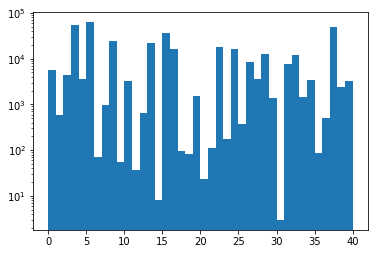

In [42]:
plt.hist(val, bins=40, log=True)

(array([1.7590e+03, 1.5800e+02, 1.0340e+03, 2.1118e+04, 1.2420e+03,
        1.7454e+04, 2.8000e+01, 2.7700e+02, 7.8290e+03, 1.3000e+01,
        9.9400e+02, 1.3000e+01, 5.0100e+02, 7.2620e+03, 2.0000e+00,
        1.5376e+04, 5.7170e+03, 2.3000e+01, 2.0000e+01, 4.8800e+02,
        1.0000e+01, 3.5000e+01, 5.3960e+03, 4.8000e+01, 4.4230e+03,
        1.0700e+02, 1.9220e+03, 1.1580e+03, 3.8680e+03, 4.6200e+02,
        0.0000e+00, 2.6270e+03, 3.4960e+03, 4.5900e+02, 1.0350e+03,
        3.9000e+01, 1.2800e+02, 1.4751e+04, 7.9200e+02, 8.6400e+02]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40.]),
 <a list of 40 Patch objects>)

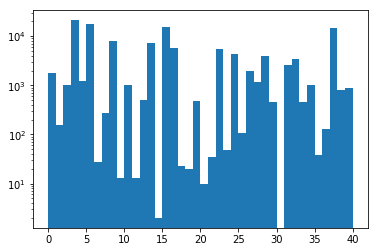

In [45]:
label_file = "s3://sagemaker-cs281/deephol-data-processed/proofs/human/test/Y_train.csv"
labels = pd.read_csv(label_file, header=None)
labels_array = np.array(labels)
val = [np.argmax(vector) for  vector in labels_array]
plt.hist(val, bins=40, log=True)

(array([1.6020e+03, 1.5000e+02, 1.0650e+03, 1.3677e+04, 9.0200e+02,
        1.6660e+04, 3.2000e+01, 2.6500e+02, 7.5740e+03, 1.4000e+01,
        9.1900e+02, 1.2000e+01, 1.7900e+02, 6.2850e+03, 2.0000e+00,
        8.6110e+03, 5.0180e+03, 3.4000e+01, 2.5000e+01, 4.3100e+02,
        1.6000e+01, 3.9000e+01, 5.2460e+03, 4.1000e+01, 4.6240e+03,
        1.0800e+02, 1.8970e+03, 1.0850e+03, 3.9540e+03, 4.1100e+02,
        0.0000e+00, 2.4000e+03, 3.5740e+03, 3.9700e+02, 1.0140e+03,
        2.0000e+01, 1.6900e+02, 1.4003e+04, 7.0600e+02, 8.9300e+02]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40.]),
 <a list of 40 Patch objects>)

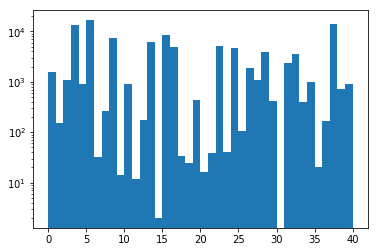

In [46]:
label_file = "s3://sagemaker-cs281/deephol-data-processed/proofs/human/valid/Y_train.csv"
labels = pd.read_csv(label_file, header=None)
labels_array = np.array(labels)
val = [np.argmax(vector) for  vector in labels_array]
plt.hist(val, bins=40, log=True)

In [48]:
a.head()

,0.000000000000000000e+00,0.000000000000000000e+00.1,0.000000000000000000e+00.2,0.000000000000000000e+00.3,0.000000000000000000e+00.4,0.000000000000000000e+00.5,0.000000000000000000e+00.6,0.000000000000000000e+00.7,0.000000000000000000e+00.8,0.000000000000000000e+00.9,...,0.000000000000000000e+00.31,0.000000000000000000e+00.32,0.000000000000000000e+00.33,1.000000000000000000e+00,0.000000000000000000e+00.34,0.000000000000000000e+00.35,0.000000000000000000e+00.36,0.000000000000000000e+00.37,0.000000000000000000e+00.38,0.000000000000000000e+00.39
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
